# GROUP 1 - Yongqi Pang, Dayoun Han

# Project 1 - Classification Task
- Objective : Can we predict that toddlers have autism from this screening ? Based on Quantitative Checklist for Autism in Toddlers data provided by ASD Tests, we wiill try to develop a simple prediction model for toddlers to predict probbility of showing ASD tratis so that their parents/guardians can consider taking steps early.

- Data Set Name: Autistic Spectrum Disorder Screening Data for Toddlers-
- Data Type : Predicve and Descriptive : Nominal / categorical, binary and continuous
- Task : Classification
- Attribute type : Categorical, continuous and binary
- Number of Instances : 1054
- Number of Atributes : 18 including the class variable
- % of Missing values : 7%

## Attributes
- A1-A9 : if the response was Sometimes / Rarely / Never, "1" was assigned to the question.
- A10 : if the response was Always / Usually /Sometimes , "1" was assigned to this question. 
- Q-chat-10-score: if your child scores more than 3, then there is a potential ASD traits otherwise no ASD traits re observed. 

## Details of A1-A10:
- A1: Does your child look at you when you call his/her name?
- A2: How easy is it for you to get eye contact with your child?
- A3: Does your child point to indicate that s/he wants something?
- A4: Does your childe point to share interest with you ?
- A5: Does your child pretend ? (e.g. care for dolls, talk on a toy phone)
- A6: Does your child follow where you're looking?
- A7: If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them ?
- A8: Would you describe your child's first words as :
- A9: Does your child use simple gestures ?
- A10: Does your child stare at nothing with no apparent purpose ?


### Importing Data Sets and Libraries

In [538]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression


# Modeling helpers
from sklearn.preprocessing import scale, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_validate

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
%matplotlib inline

autism = pd.read_csv('Project/Autism.csv')

In [539]:
from mlxtend.plotting import plot_decision_regions

In [540]:
# number of rows and columns in the dataframe 
print('Shape of dataframe:', autism.shape)

# Printing the name of columns in the dataframe
print('Names of columns of dataframe: ', autism.columns)

Shape of dataframe: (1054, 19)
Names of columns of dataframe:  Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')


### Data Exploration (Missing values, Data Interpretation)

<AxesSubplot:>

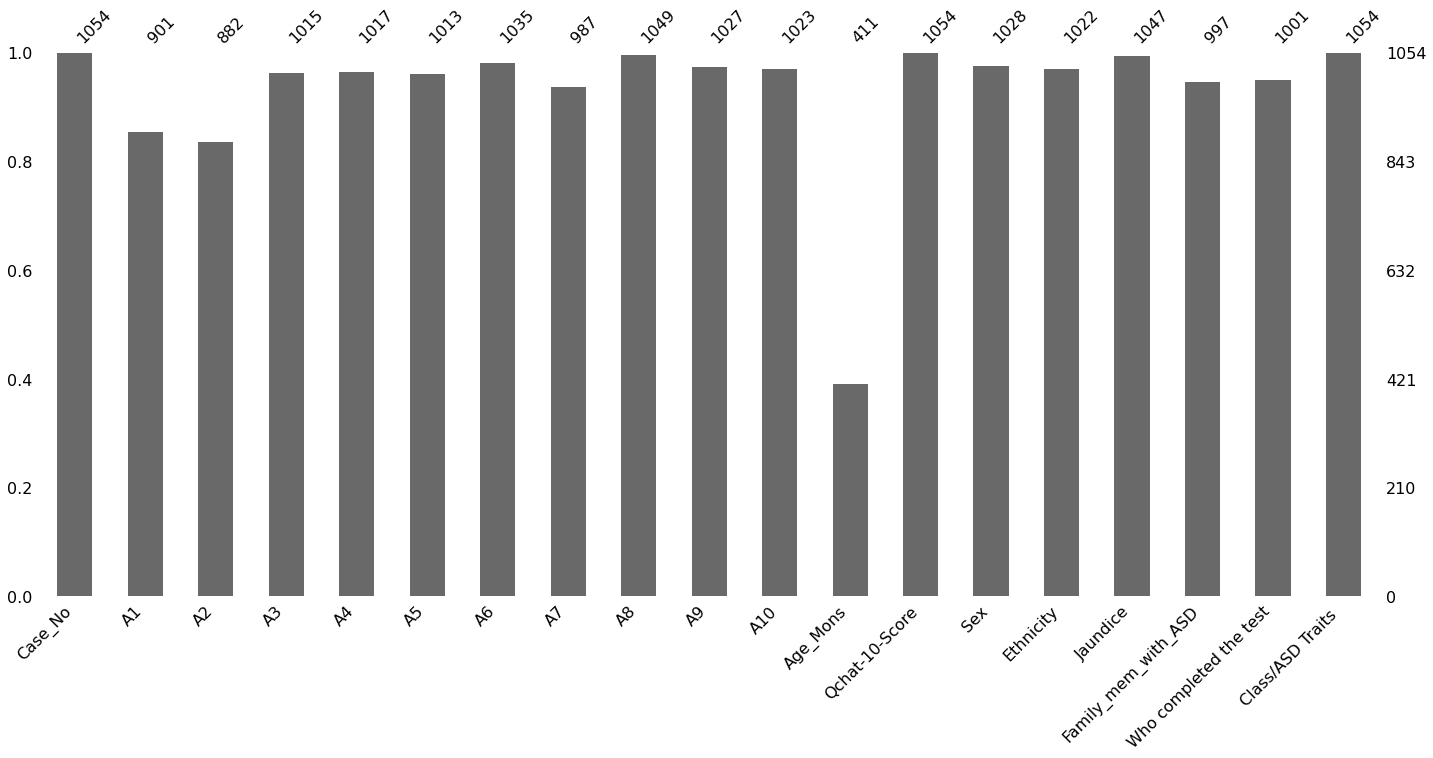

In [541]:
# Visualizing mising values using bar chart
import missingno as msno

msno.bar(autism)

According to this bar chart, we can observe that we have many missing values in the several columns which is required to handle missing values before we do data-transformation.

In [542]:
# Calculating Missing values

missing = autism.isnull().sum().sum()
total = autism.count().sum()

print("count of missing values:", missing)
print("count of total: ", total)
print('missing values % of a dataframe: ', missing/total)

count of missing values: 1409
count of total:  18617
missing values % of a dataframe:  0.07568351506687436


In [543]:
autism.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,28.0,3,f,middle eastern,yes,no,family member,No
1,2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,36.0,4,m,White European,yes,no,family member,Yes
2,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,36.0,4,m,middle eastern,yes,no,family member,Yes
3,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0,10,m,Hispanic,no,no,family member,Yes
4,5,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,9,f,White European,no,yes,family member,Yes


In [544]:
# Dropping columns that don't affect to the prediction. 
autism.drop(['Case_No', 'Who completed the test', 'Qchat-10-Score'], axis=1, inplace=True)
autism.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

### Visualizations for some features

Text(0.5, 1.0, 'ASD positive Toddlers born with jaundice based on gender')

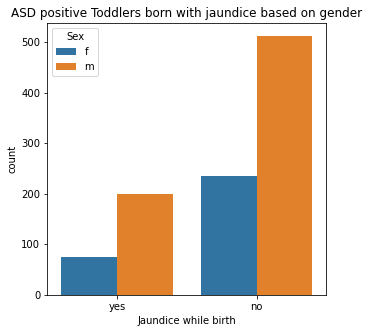

In [545]:
plt.figure(figsize=(5,5))
sns.countplot(x='Jaundice', data= autism, hue='Sex')
plt.xlabel('Jaundice while birth')
plt.title('ASD positive Toddlers born with jaundice based on gender')

From the plot, we can see Jaundice born child have a weak link with ASD. Also, ASD is more common among boys than among girls which is nearly 4 times boys than girls.

Text(0.5, 1.0, 'Age distribution of ASD positive')

<Figure size 360x360 with 0 Axes>

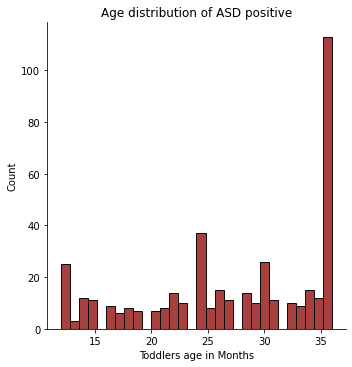

In [546]:
# Age distribution of ASD positive

plt.figure(figsize=(5,5))
sns.displot(autism['Age_Mons'],kde=False, bins=30, color='darkred')
plt.xlabel('Toddlers age in Months')
plt.title('Age distribution of ASD positive')

For toddlers, most of ASD positives are around 36 months. We can see in toddlers as the age increases, the positive number increases. It also indicates the significant signs of autism reveals around 3 years of age.

Text(0.5, 0, 'Toddler Relatives with ASD')

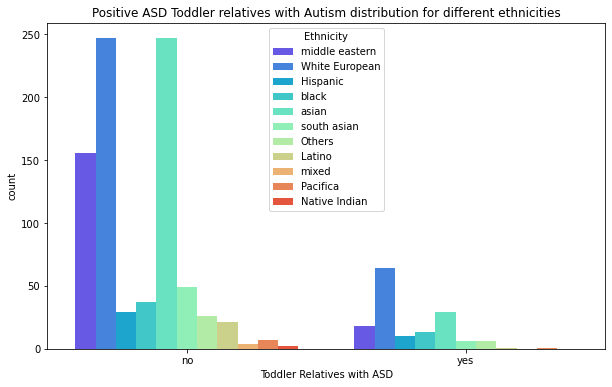

In [547]:
# Visualize the distribution of autism in family within different ethnicity
plt.figure(figsize=(10,6))
sns.countplot(x='Family_mem_with_ASD', data=autism, hue='Ethnicity', palette='rainbow')
plt.title('Positive ASD Toddler relatives with Autism distribution for different ethnicities')
plt.xlabel('Toddler Relatives with ASD')

We can observe that White and Europeans Ethnicities have very high chance of being ASD positive if they have it in their genes. Black and Asians follow the next though with smaller ratios. Therefore, we can say that there is a genetic link for ASD positive.

### Handling Missing values
-  Binary variables - Handling missing values with the most frequent values 
-  Numerical variables (e.g.) - The mean of the numerical column data is used to replace null values when the data is normally distributed. Median is used if the data comprised of outliers. Mode is used when the data having more occurences of a particular value or more frequent value. 

In [548]:
# Numerical Variables Handling Missing values
autism['Age_Mons'] = autism['Age_Mons'].fillna(autism['Age_Mons'].mean()).astype(int)

# Categorical Variables Handling Missing values 
cols2 = ['Sex','Ethnicity','Jaundice','Family_mem_with_ASD']
autism[cols2]=autism[cols2].fillna(autism.mode().iloc[0])
cols = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10']
autism[cols]=autism[cols].fillna(autism.mode().iloc[0]).astype(int)

<AxesSubplot:>

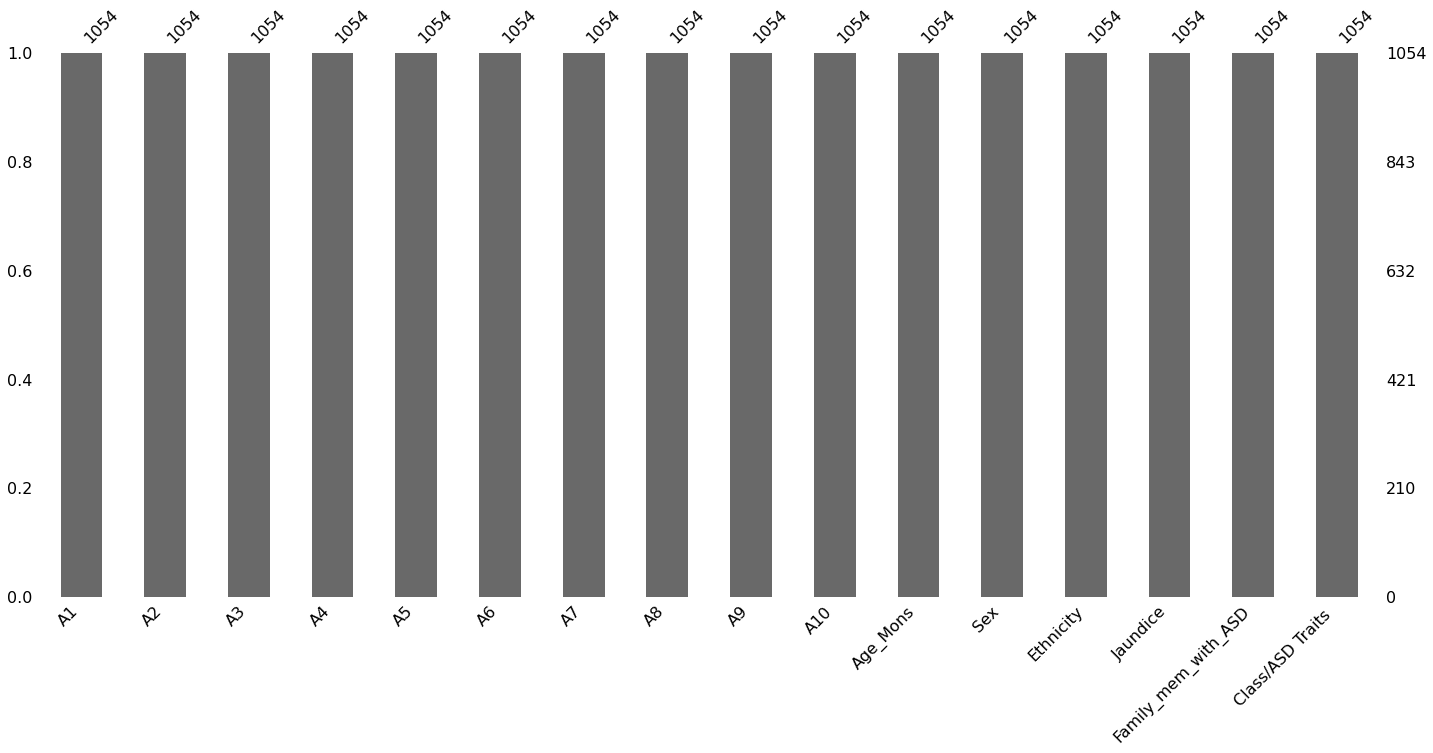

In [549]:
msno.bar(autism)

Now, we are able to observe we don't have any missing values this this data set. 

### Data Pre-Processing



Our goal in this step is changing all the categorical values to numerical values which is more appropriate to build a machine learning model. Next we will split our data set into test/ train data set and scale our feature variables. 

In [550]:
# To mapping variables, we need to find which value is the most frequent values in each column.
print(autism['Sex'].value_counts())
print(autism['Jaundice'].value_counts())
print(autism['Family_mem_with_ASD'].value_counts())
print(autism['Class/ASD Traits '].value_counts())

m    742
f    312
Name: Sex, dtype: int64
no     769
yes    285
Name: Jaundice, dtype: int64
no     902
yes    152
Name: Family_mem_with_ASD, dtype: int64
Yes    728
No     326
Name: Class/ASD Traits , dtype: int64


In [551]:
# For Ethnicity column, we will use dummy for data transformation. 
autism = pd.get_dummies(autism, columns=['Ethnicity'])

# For other columns, we will map each values to 1 or 0.
autism['Sex']=np.where(autism['Sex']=='m',1,0).astype(int)
autism['Jaundice']=np.where(autism['Jaundice']=='no',1,0).astype(int)
autism['Family_mem_with_ASD']=np.where(autism['Family_mem_with_ASD']=='no',1,0).astype(int)
autism['Class/ASD Traits ']=np.where(autism['Class/ASD Traits ']=='Yes',1,0).astype(int)

In [552]:
y=autism['Class/ASD Traits ']
X=autism.drop(['Class/ASD Traits '], axis=1)

len(y) == len(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Evaluation Strategy
- Evaluation startegy in Clasification task is crucial due to an unbalanced class distribution. Hence, we need other metrics to evaluate our model. 
- Precision : measuring how good our model is wehn the prediction is positive. The focus of precision is positive predictions. It indicates how many positive predictions are true. 
- Recall : measuing how good our model is at correctly prediction positive classes. The focus of recall is actual positive classes. It indicates how many of the positive classes the model is able to predict correctly. 
- In our case, we need to maximize recall because we want to detect positive classes as much as possible since this case is about the disease. 
- In the final step, we will use precision-recall curve to find the best threshold and will apply it to our model to maximize the recall score.

### KNN Classifier

It is simple to build a KNN classifier model but the computation cost is high because of calculating the distance between the data points for all the training samples. So it would be not a good idea to use KNN Classifier when we have large sample data. 

In [553]:
train_score_array = []
test_score_array = []

for k in range(1,30):
    knn=KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

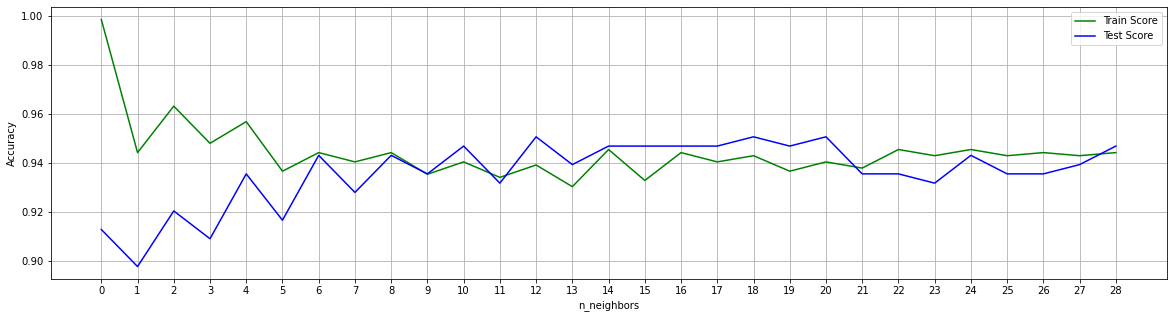

In [554]:
x_axis = range(1,30)
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(x_axis, np.arange(29))
plt.grid()
plt.legend()

From the above chart, we can identify which n-neighbors is giving the most high test score. We can get the score with that n-neighbors.

In [555]:
knn = KNeighborsClassifier(20)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))
print("Recall score: {:.4f}".format(recall_score(y_test,knn_pred, average='binary')) )


Train score: 0.9367
Test score: 0.9470
Recall score: 0.9474


### Logistic Regression

- Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV. So we will find a list of best hyperparamters which GridSearchCV will select the best value of parameters
- Second, we will print out the results of best parameters and evalute the model. 

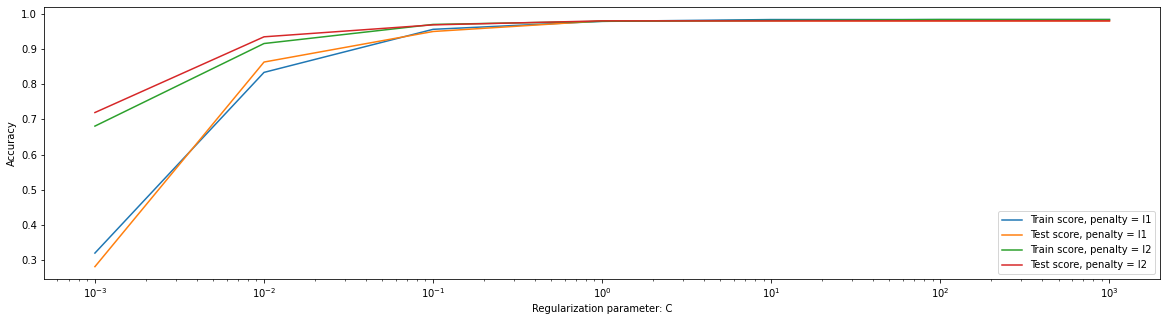

In [556]:
# re-spliting the data 
y=autism['Class/ASD Traits ']
X=autism.drop(['Class/ASD Traits '], axis=1)

len(y) == len(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Testing out which C parameter is the best 
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Setting up the for loop to calculate score for each parameters combination. 
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))
    
# Visualization for our logistic regression. 

import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

According to the visualization, we can observe that we have the highest score at C=1 for both l1 and l2 penalty

In [557]:
# Finding the best C using GridSearch CV.
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, penalty='l2')
logreg.fit(X_train,y_train)

print("Train Score", logreg.score(X_train, y_train))
print("Test Score", logreg.score(X_test, y_test))

# Parameter candidates 

lr_param = {
    'C': [0.001,0.01,0.1,1,10,100,1000],
}

# Applying parameter candidates to the gridsearch
lr_grid = GridSearchCV(logreg, param_grid=lr_param, refit = True)

# Fitting the model for grid search
lr_results = lr_grid.fit(X_train, y_train)

lr_pred = logreg.predict(X_test)

# Summarize
print("Best score: ", lr_results.best_score_)
print("Best parameters: ", lr_results.best_params_)
print("Recall score: {:.4f}".format(recall_score(y_test,lr_pred, average='binary')) )


Train Score 0.979746835443038
Test Score 0.9810606060606061
Best score:  0.9746835443037976
Best parameters:  {'C': 1}
Recall score: 0.9947


### DecisionTreeClassifier

It is easy to interpret and read DecisionTreeClassifier but we prefer not to use this model due to the low score.

Train Score:  0.9987341772151899
Test Score:  0.9166666666666666
Best score:  0.9423849082727587
Best estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
Best parameters:  {'criterion': 'entropy', 'max_depth': 10}
Recall score: 0.9211


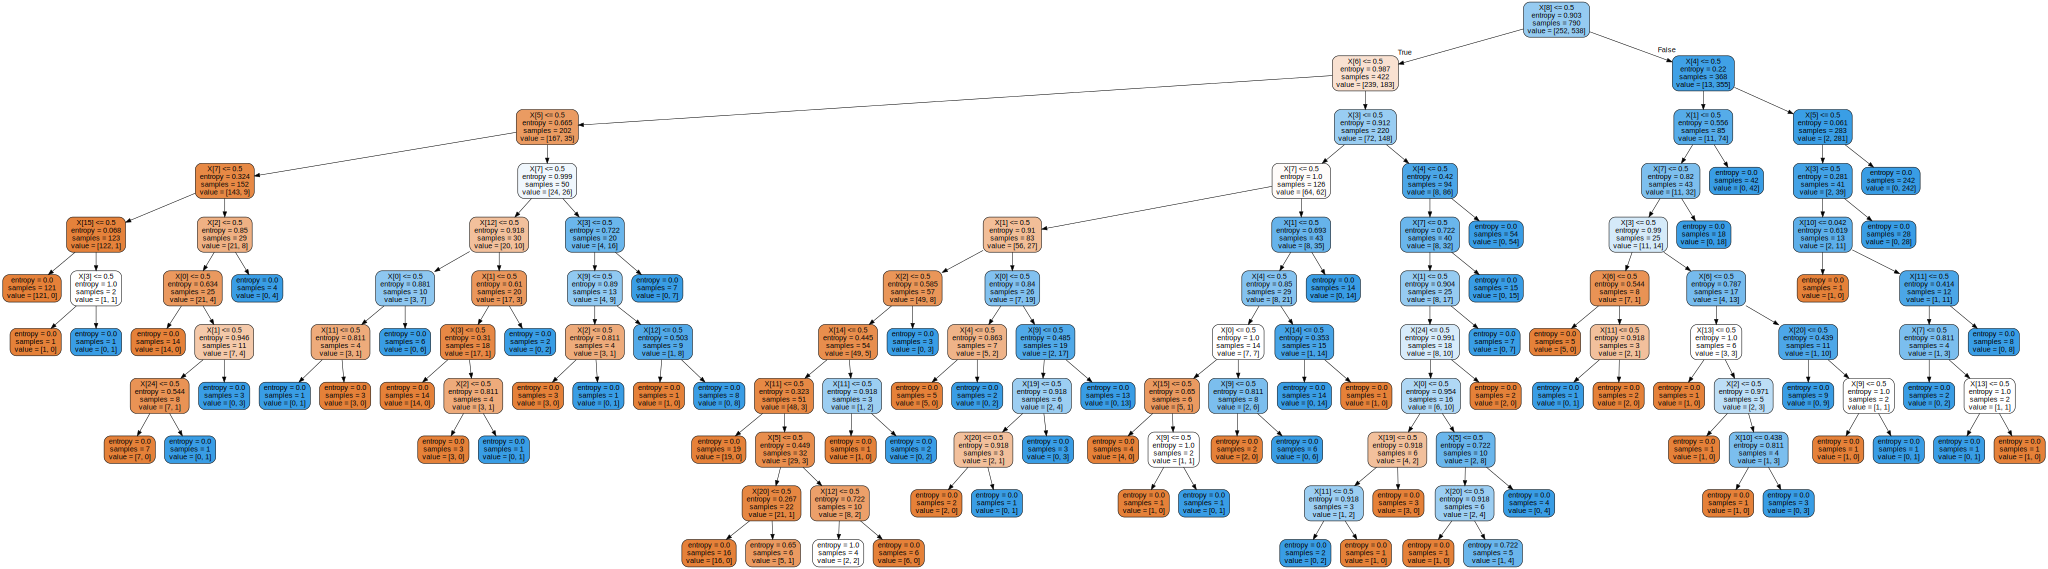

In [558]:
# re-spliting and re-scailing the dataset. 
y=autism['Class/ASD Traits ']
X=autism.drop(['Class/ASD Traits '], axis=1)

len(y) == len(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating DecisionTreeClasifier
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Train Score: ", tree.score(X_train, y_train))
print("Test Score: ", tree.score(X_test, y_test))


# Creating parameter sets
tree_para = {
            'criterion': ['gini','entropy'],
            'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}

# Finding the best hyperparameters using GridSearchCV
gs_tree=GridSearchCV(tree,tree_para,cv=5, scoring ='recall')
gs_tree_results=gs_tree.fit(X_train,y_train)

# Printing
print("Best score: ", gs_tree_results.best_score_)
print("Best estimator: ", gs_tree_results.best_estimator_)
print("Best parameters: ", gs_tree_results.best_params_)


tree_pred = tree.predict(X_test)

# Printing the visualization
best_results = DecisionTreeClassifier(max_depth=10, random_state=0, criterion='entropy')
best_results.fit(X_train, y_train)
print("Recall score: {:.4f}".format(recall_score(y_test,tree_pred, average='binary')) )

import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(best_results, out_file=None, filled=True, rounded=True)

graph = graphviz.Source(dot_data)

graph

### LinearSVM

Using this LinearSVM model, we can separate two classes using the hyperplane maximizing the margin from the line to the support vector points.

In [559]:
# re-spliting and re-scailing
y=autism['Class/ASD Traits ']
X=autism.drop(['Class/ASD Traits '], axis=1)


len(y) == len(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# convering df to numpy array
y=y.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

Text(0.5, 1.0, 'LinearSVM Decision Region Boundary')

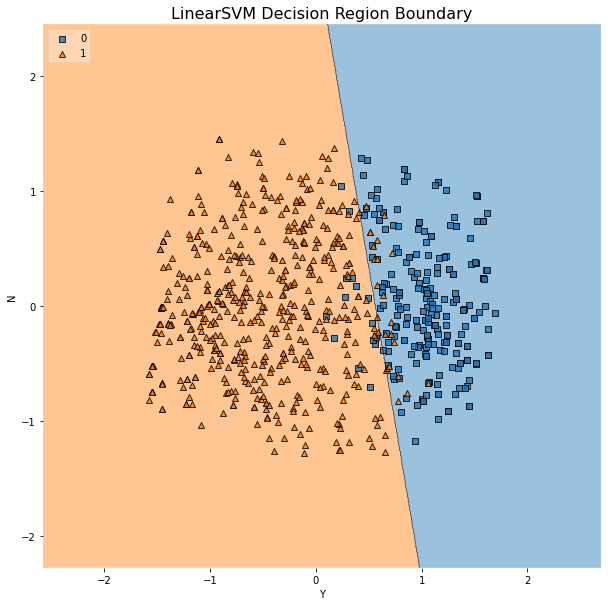

In [560]:
from sklearn.decomposition import PCA
from sklearn import svm

# Creating linear SVM
lin=svm.SVC(kernel='linear',random_state=0)
lin.fit(X_train,y_train)

# This code is for making X_train feature variabiles into 2 
pca=PCA(n_components=2)
X_train1=pca.fit_transform(X_train)
lin.fit(X_train1, y_train)

# Visualizing..
plt.subplots(figsize=(10,10))
plot_decision_regions(X_train1,y_train, clf=lin, legend=2)
plt.xlabel('Y')
plt.ylabel('N')
plt.title('LinearSVM Decision Region Boundary', size=16)



In [561]:
#Creating LinearSVM and searching best parameters using GridSearchCV

from mlxtend.plotting import plot_decision_regions


linsvm=svm.SVC(kernel='linear',random_state=0).fit(X_train, y_train)
print("Test score: ", linsvm.score(X_test, y_test))
print("Train score: ", linsvm.score(X_train, y_train))

linsvm_para = {  
    'C': [0.001,0.01,0.1,1,10,100,1000],
}

gs_linsvm=GridSearchCV(linsvm,linsvm_para)
gs_linsvm_results =gs_linsvm.fit(X_train, y_train)


linsvm_pred = linsvc.predict(X_test)

# Printing summarizes
print("Best score: ", gs_linsvm_results.best_score_)
print("Best estimator: ", gs_linsvm_results.best_estimator_)
print("Best parameters: ", gs_linsvm_results.best_params_)
print("Recall score: {:.4f}".format(recall_score(y_test,linsvm_pred, average='binary')) )


Test score:  0.9810606060606061
Train score:  0.9784810126582278
Best score:  0.9772151898734178
Best estimator:  SVC(C=1, kernel='linear', random_state=0)
Best parameters:  {'C': 1}
Recall score: 0.9947


In [562]:
print(linsvc.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])


### Kerenilzed Support Vector Machine (rbf, poly, and linear)

In [563]:
rbf = SVC(kernel='rbf')
rbf.fit(X_train, y_train)
print("Test score: ", rbf.score(X_test, y_test))
print("Train score: ", rbf.score(X_train, y_train))

rbf_para = {
            'C': [0.001,0.01,0.1,1,10,100,1000],
            'gamma': [0.001,0.01,0.1,1,10,100,1000]
}

# Finding the best hyperparameters using GridSearchCV
gs_rbf=GridSearchCV(rbf,rbf_para)
gs_rbf_results =gs_rbf.fit(X_train,y_train)

rbf_pred = rbf.predict(X_test)
# Printing
print("Best score: ", gs_rbf_results.best_score_)
print("Best estimator: ", gs_rbf_results.best_estimator_)
print("Best parameters: ", gs_rbf_results.best_params_)
print("Recall score: {:.4f}".format(recall_score(y_test,rbf_pred, average='binary')) )

Test score:  0.9734848484848485
Train score:  0.9848101265822785
Best score:  0.9772151898734178
Best estimator:  SVC(C=1000, gamma=0.001)
Best parameters:  {'C': 1000, 'gamma': 0.001}
Recall score: 0.9842


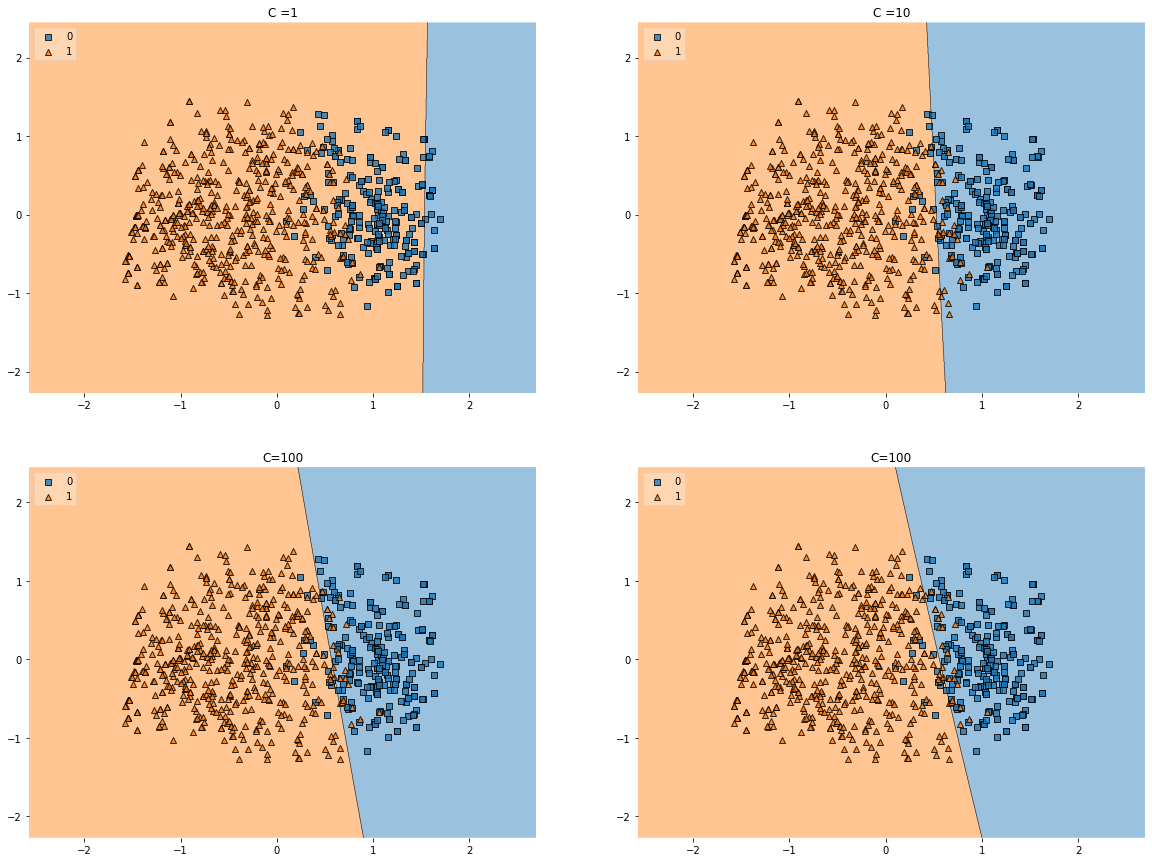

In [564]:
# Visualization
import matplotlib.gridspec as gridspec
import itertools

gamma= 0.001
clf1 = SVC(kernel='rbf', gamma=gamma, C=1)
clf2 = SVC(kernel='rbf', gamma=gamma, C=10)
clf3 = SVC(kernel='rbf', gamma=gamma, C=100)
clf4 = SVC(kernel='rbf', gamma=gamma, C=1000)

gs=gridspec.GridSpec(2,2)
fig=plt.figure(figsize=(20,15))

labels = ['C =1','C =10','C=100','C=100']

pca=PCA(n_components=2)
X_train1=pca.fit_transform(X_train)


for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                        labels,
                        itertools.product([0,1],
                                          repeat=2)):
 
    clf.fit(X_train1, y_train)
    ax= plt.subplot(gs[grd[0], grd[1]])
    fig= plot_decision_regions(X=X_train1, y=y_train, clf=clf, legend=2)
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()
    

In [565]:
poly = SVC(kernel='poly')
poly.fit(X_train, y_train)
print("Test score: ", poly.score(X_test, y_test))
print("Train score: ", poly.score(X_train, y_train))
poly_para = {
            'C': [0.001,0.01,0.1,1,10,100,1000],
            'gamma': [0.001,0.01,0.1,1,10,100,1000]
}

# Finding the best hyperparameters using GridSearchCV
gs_poly=GridSearchCV(poly,poly_para)
gs_poly_results =gs_poly.fit(X_train,y_train)


poly_pred =poly.predict(X_test)
# Printing
print("Best score: ", gs_poly_results.best_score_)
print("Best estimator: ", gs_poly_results.best_estimator_)
print("Best parameters: ", gs_poly_results.best_params_)
print("Recall score: {:.4f}".format(recall_score(y_test,poly_pred, average='binary')) )


Test score:  0.9734848484848485
Train score:  0.9860759493670886
Best score:  0.9645569620253165
Best estimator:  SVC(C=0.01, gamma=1, kernel='poly')
Best parameters:  {'C': 0.01, 'gamma': 1}
Recall score: 0.9737


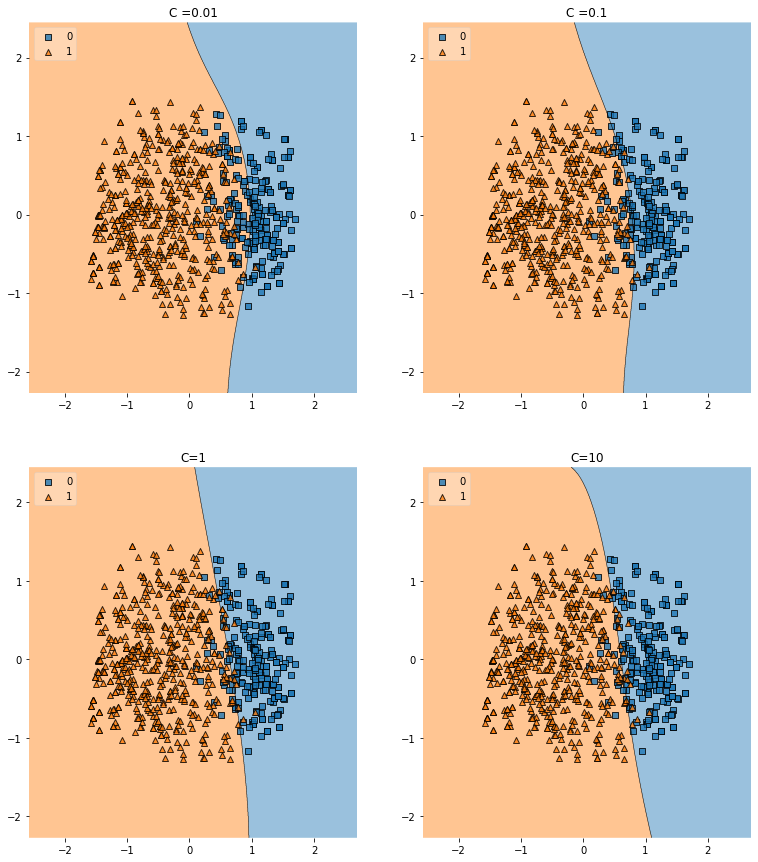

In [566]:
# Visualization
import matplotlib.gridspec as gridspec
import itertools

gamma= 1
clf1 = SVC(kernel='poly', gamma=gamma, C=0.01)
clf2 = SVC(kernel='poly', gamma=gamma, C=0.1)
clf3 = SVC(kernel='poly', gamma=gamma, C=1)
clf4 = SVC(kernel='poly', gamma=gamma, C=10)

gs=gridspec.GridSpec(2,3)
fig=plt.figure(figsize=(20,15))

labels = ['C =0.01','C =0.1','C=1','C=10']

pca=PCA(n_components=2)
X_train1=pca.fit_transform(X_train)


for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                        labels,
                        itertools.product([0,1],
                                          repeat=2)):
 
    clf.fit(X_train1, y_train)
    ax= plt.subplot(gs[grd[0], grd[1]])
    fig= plot_decision_regions(X=X_train1, y=y_train, clf=clf, legend=2)
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()
    

I observe GridSearchCV says C=0.01, gamma=1 is the best hyperparameter but contradicts to the visualization. From the above graphs, it appears that C=0.01 is not separating two classes correctly. 

In [567]:
linear = SVC(kernel='linear')
linear.fit(X_train, y_train)
print("Test score: ", linear.score(X_test, y_test))
print("Train score: ", linear.score(X_train, y_train))

linear_para = {
            'C': [0.001,0.01,0.1,1,10,100,1000],
            'gamma': [0.001,0.01,0.1,1,10,100,1000]
}

# Finding the best hyperparameters using GridSearchCV
gs_linear=GridSearchCV(linear,linear_para)
gs_linear_results =gs_linear.fit(X_train,y_train)


linear_pred =poly.predict(X_test)
# Printing
print("Best score: ", gs_linear_results.best_score_)
print("Best estimator: ", gs_linear_results.best_estimator_)
print("Best parameters: ", gs_linear_results.best_params_)
print("Recall score: {:.4f}".format(recall_score(y_test,linear_pred, average='binary')) )


Test score:  0.9810606060606061
Train score:  0.9784810126582278
Best score:  0.9772151898734178
Best estimator:  SVC(C=1, gamma=0.001, kernel='linear')
Best parameters:  {'C': 1, 'gamma': 0.001}
Recall score: 0.9737


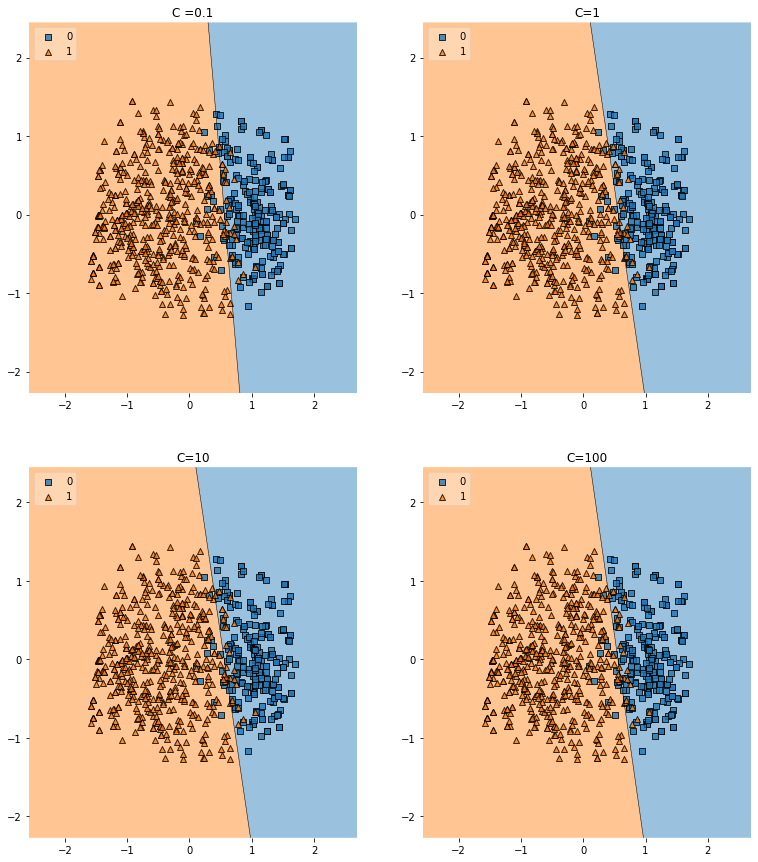

In [568]:
# Visualization
import matplotlib.gridspec as gridspec
import itertools

gamma= 0.001

clf1 = SVC(kernel='linear', gamma=gamma, C=0.1)
clf2 = SVC(kernel='linear', gamma=gamma, C=1)
clf3 = SVC(kernel='linear', gamma=gamma, C=10)
clf4 = SVC(kernel='linear', gamma=gamma, C=100)

gs=gridspec.GridSpec(2,3)
fig=plt.figure(figsize=(20,15))

labels = ['C =0.1','C=1','C=10','C=100']

pca=PCA(n_components=2)
X_train1=pca.fit_transform(X_train)


for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                        labels,
                        itertools.product([0,1],
                                          repeat=2)):
 
    clf.fit(X_train1, y_train)
    ax= plt.subplot(gs[grd[0], grd[1]])
    fig= plot_decision_regions(X=X_train1, y=y_train, clf=clf, legend=2)
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()
    

# Conclusion
- We will choose LinearSVM as the best model based on the recall scoring what we suggested at the beginning of this work. We will re-run LinearSVM on the data set again and evalute the model below.

### Step1 : Spliting data set and Scaling.

In [569]:
# Spliting the data set again into train data and test data and scailing the data. 

y=autism['Class/ASD Traits ']
X=autism.drop(['Class/ASD Traits '], axis=1)


len(y) == len(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Step2: 1) Creating the model and Searhcing for the best parameters

In [570]:
#Creating LinearSVM

from mlxtend.plotting import plot_decision_regions


linsvm=svm.SVC(kernel='linear',random_state=0).fit(X_train, y_train)
print("Test score: ", linsvm.score(X_test, y_test))
print("Train score: ", linsvm.score(X_train, y_train))

# generating gridsearchCV for the hyperparameters
linsvm_para = {  
    'C': [0.001,0.01,0.1,1,10,100,1000],
}

gs_linsvm=GridSearchCV(linsvm,linsvm_para)
gs_linsvm_results =gs_linsvm.fit(X_train, y_train)


linsvm_pred = linsvc.predict(X_test)

# Printing
print("Best score: ", gs_linsvm_results.best_score_)
print("Best estimator: ", gs_linsvm_results.best_estimator_)
print("Best parameters: ", gs_linsvm_results.best_params_)
print("Recall score: {:.4f}".format(recall_score(y_test,linsvm_pred, average='binary')) )

Test score:  0.9810606060606061
Train score:  0.9784810126582278
Best score:  0.9772151898734178
Best estimator:  SVC(C=1, kernel='linear', random_state=0)
Best parameters:  {'C': 1}
Recall score: 0.9947


### Step 2: 2) Visualization

Text(0.5, 1.0, 'LinearSVM Decision Region Boundary')

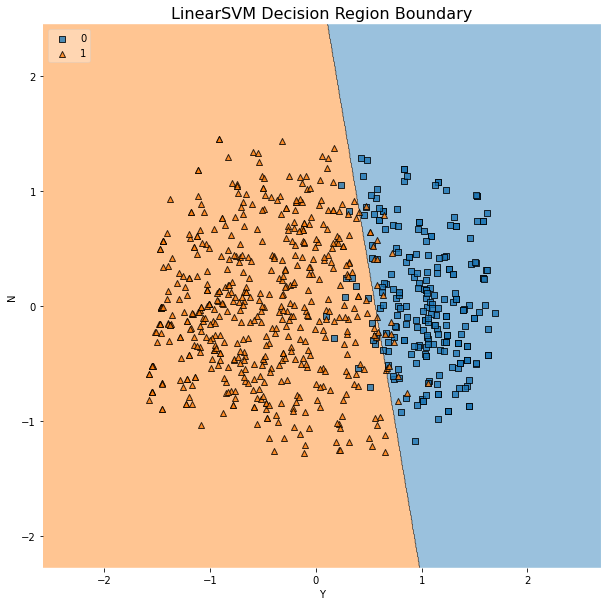

In [571]:
# converting df to numpy array
y=y.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

# Creating linear SVM
lin=svm.SVC(kernel='linear',random_state=0, C=1)
lin.fit(X_train,y_train)

# This code is for making X_train feature variabiles into 2 
pca=PCA(n_components=2)
X_train1=pca.fit_transform(X_train)
lin.fit(X_train1, y_train)

# Visualizing..
plt.subplots(figsize=(10,10))
plot_decision_regions(X_train1,y_train, clf=lin, legend=2)
plt.xlabel('Y')
plt.ylabel('N')
plt.title('LinearSVM Decision Region Boundary', size=16)


### Step 3: Evaluation

In [572]:
from sklearn.metrics import classification_report
print(classification_report(y_test, linsvm_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        74
           1       0.98      0.99      0.99       190

    accuracy                           0.98       264
   macro avg       0.98      0.97      0.98       264
weighted avg       0.98      0.98      0.98       264



In [573]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, linsvm_pred))

[[ 70   4]
 [  1 189]]


### Precision_Recall_Curve

We can calculate the precision and recall for thresholds using the precision_recall_curve()function. And then, by adjusting the thresdhold, we can maximize our recall score.

In [574]:
linsvm2= svm.SVC(kernel='linear', C=1, random_state=0)
linsvm2.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

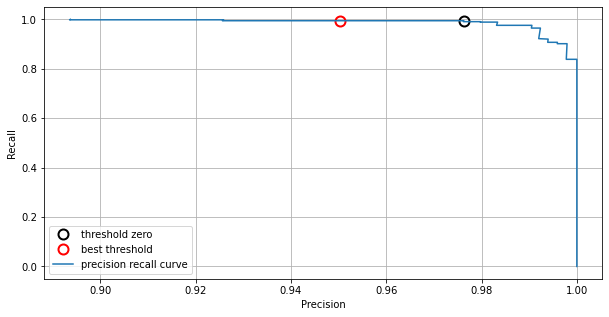

In [575]:
from sklearn.metrics import precision_recall_curve

plt.subplots(figsize=(10,5))
precision, recall, thresholds = precision_recall_curve(y_train, linsvm2.decision_function(X_train))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero],'o', markersize=10,
        label='threshold zero', fillstyle="none", c='k', mew=2)

plt.plot(precision[37], recall[37],'o', markersize=10,
        label='best threshold', fillstyle="none", c='r', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()




In [576]:
from sklearn.metrics import precision_score, recall_score

y_predict = np.where(linsvm.decision_function(X_test) >= 0, 1, 0)
print('Before the post processing: ')
print('Precision: ', precision_score(y_test, y_predict))
print('Recall: ', recall_score(y_test, y_predict))

Before the post processing: 
Precision:  0.9792746113989638
Recall:  0.9947368421052631


In [577]:
np.argmin(np.abs(precision-0.95))

37

In [578]:
y_predict = np.where(linsvm.decision_function(X_test) >= thresholds[37], 1, 0)
print('After the post processing: ')
print('Precision: ', precision_score(y_test, y_predict))
print('Recall: ', recall_score(y_test, y_predict))

After the post processing: 
Precision:  0.9547738693467337
Recall:  1.0
